In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# here we clean the dataset by replacing the null values by some values


data['Age'].fillna(data['Age'].median(), inplace=True)

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data['HasCabin'] = data['Cabin'].notna().astype(int)
# as cabin columns has very large no. of null values we can drop this columns
data.drop('Cabin', axis=1, inplace=True)

print(data.isnull().sum())

print(data.head())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  HasCabin  
0      0         A/5 21171   7.2500        S  

In [7]:
data.duplicated().sum()

0

In [8]:
# this is the descriptive statistics which summarize the central tendamcy , dispersion , and shape of datasets distribution

print(data.describe(include=['O']))


print(data['Sex'].value_counts())
print(data['Embarked'].value_counts())

                           Name   Sex  Ticket Embarked
count                       891   891     891      891
unique                      891     2     681        3
top     Braund, Mr. Owen Harris  male  347082        S
freq                          1   577       7      646
Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


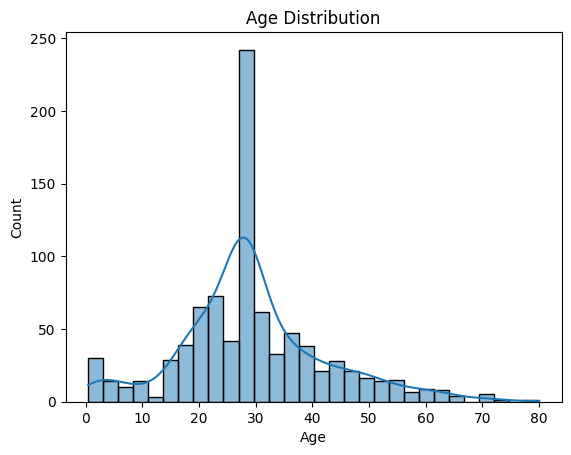

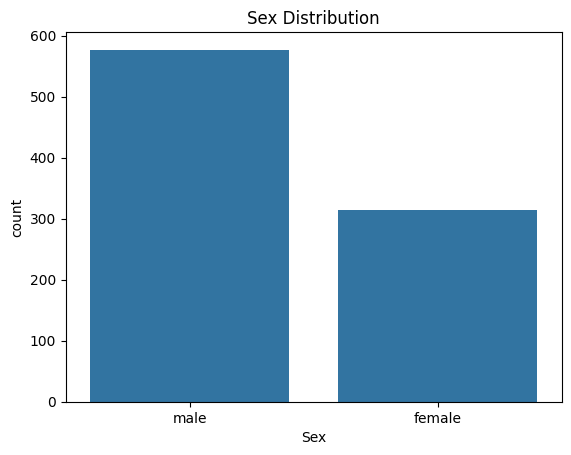

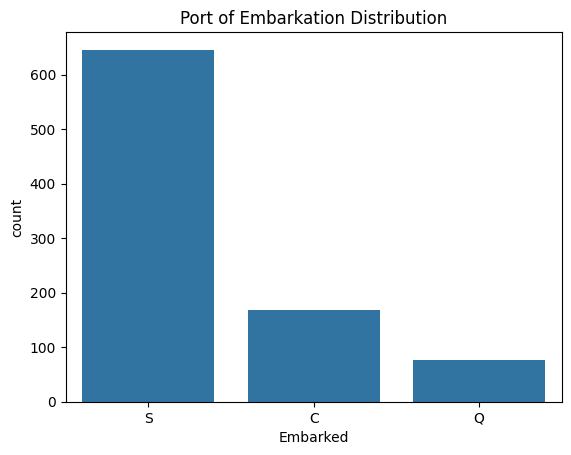

In [9]:
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Bar chart for Sex distribution
sns.countplot(data=data, x='Sex')
plt.title('Sex Distribution')
plt.show()

# Bar chart for Embarked distribution
sns.countplot(data=data, x='Embarked')
plt.title('Port of Embarkation Distribution')
plt.show()